### Testing VisionPatchDataModule.py

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 40]

In [3]:
import radio as rio
import torchio as tio
from radio.data import VisionPatchDataModule

In [4]:
subject = tio.datasets.Colin27()
train_subjects = 10 * [subject]

In [5]:
data = VisionPatchDataModule(
    train_subjects=train_subjects,
    patch_size=(96, 96, 1),
    queue_max_length=300,
    samples_per_volume=10,
    batch_size=16,
    num_workers=0,
)   

DataModule property `train_transforms` was deprecated in v1.5 and will be removed in v1.7.
DataModule property `val_transforms` was deprecated in v1.5 and will be removed in v1.7.
DataModule property `test_transforms` was deprecated in v1.5 and will be removed in v1.7.


In [6]:
data.prepare_data()
data.setup(stage='fit')

DataModule property `train_transforms` was deprecated in v1.5 and will be removed in v1.7.
DataModule property `val_transforms` was deprecated in v1.5 and will be removed in v1.7.


In [7]:
print(f"Training: {data.size_train} patches.")
print(f"Validation: {data.size_val} patches.")

Training: 80 patches.
Validation: 20 patches.


#### Get a Train and a Test Batch

In [8]:
train_dataloaders = data.train_dataloader()
val_dataloaders = data.val_dataloader()

In [9]:
# Takes a long time if resampling is required.
# Preprocessing beforehand is therefore recommended to speed up training.
train_batch = next(iter(train_dataloaders[0]))

In [10]:
train_batch.keys()

dict_keys(['t1', 'head', 'brain', 'location'])

In [11]:
train_batch['brain']['data'].shape

torch.Size([16, 1, 96, 96, 1])

#### Plot Example Samples from Batches

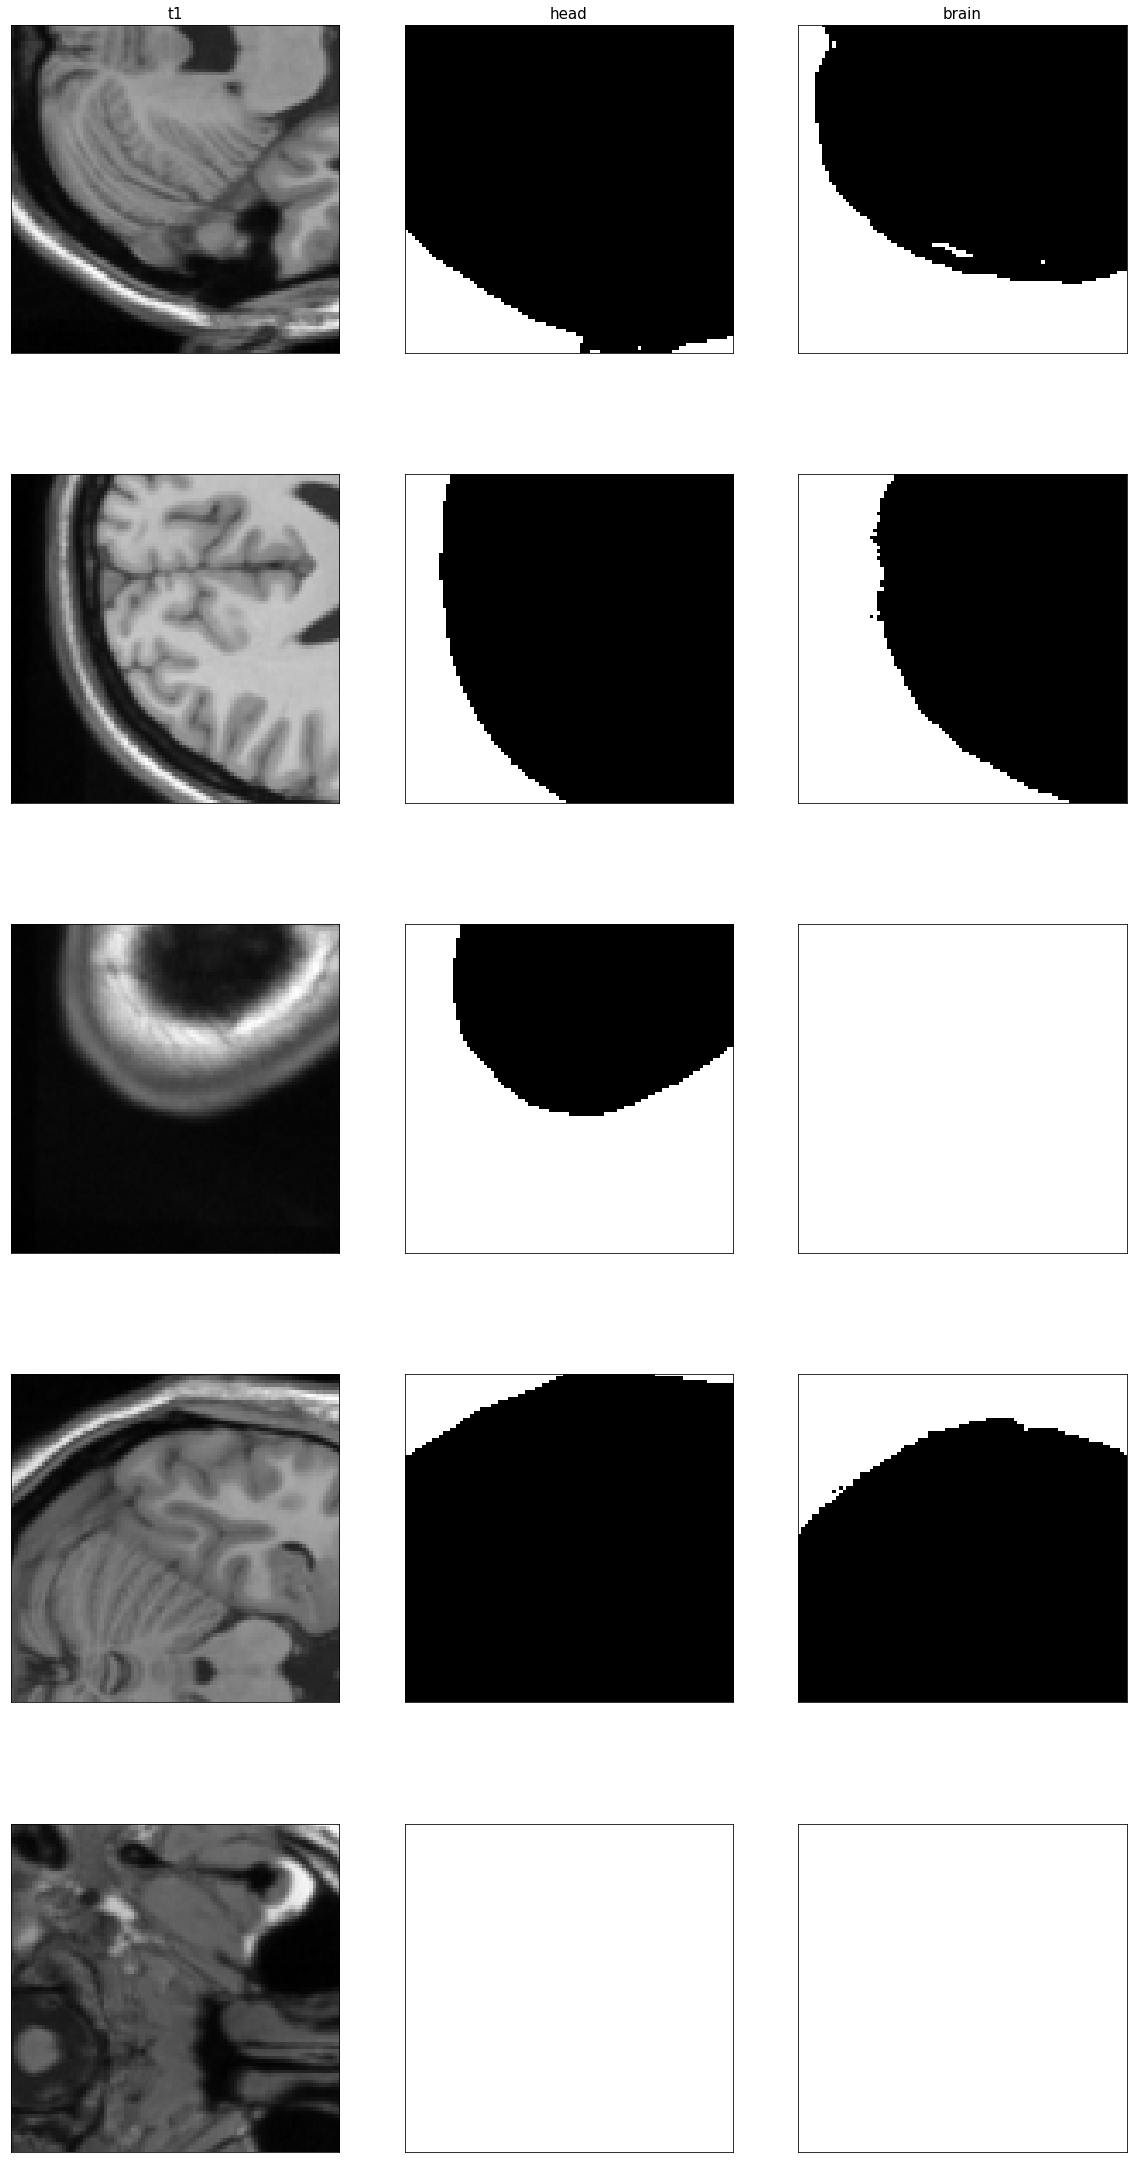

In [12]:
rio.data.plot_batch(train_batch,
                    modalities=["t1"],
                    labels=["head", "brain"],
                    exclude_keys=["location"],
                    train=True)